In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix

In [ ]:
from google.colab import files
uploaded = files.upload()  # This will prompt you to upload a file

Saving updated_pollution_dataset.csv to updated_pollution_dataset (13).csv


In [ ]:
data = pd.read_csv('updated_pollution_dataset.csv')
data.head(10)

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,Moderate
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,Moderate
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,Moderate
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,Good
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,Good
5,39.4,96.6,14.6,35.5,42.9,17.9,1.82,3.1,674,Hazardous
6,41.7,82.5,1.7,15.8,31.1,12.7,1.80,4.6,735,Poor
7,31.0,59.6,5.0,16.8,24.2,13.6,1.38,6.3,443,Moderate
8,29.4,93.8,10.3,22.7,45.1,11.8,2.03,5.4,486,Poor
9,33.2,80.5,11.1,24.4,32.0,15.3,1.69,4.9,535,Poor


In [ ]:
print('Total Features: ') #10
print(data.keys())

Total Features: 
Index(['Temperature', 'Humidity', 'PM2.5', 'PM10', 'NO2', 'SO2', 'CO',
       'Proximity_to_Industrial_Areas', 'Population_Density', 'Air Quality'],
      dtype='object')


In [ ]:
data_point = data.shape[0]
print('Data points: ',data_point) #no of rows

Data points:  5000


In [ ]:
print(data.info()) #9 Quantatative and 1 categorical

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Temperature                    5000 non-null   float64
 1   Humidity                       5000 non-null   float64
 2   PM2.5                          5000 non-null   float64
 3   PM10                           5000 non-null   float64
 4   NO2                            5000 non-null   float64
 5   SO2                            5000 non-null   float64
 6   CO                             5000 non-null   float64
 7   Proximity_to_Industrial_Areas  5000 non-null   float64
 8   Population_Density             5000 non-null   int64  
 9   Air Quality                    5000 non-null   object 
dtypes: float64(8), int64(1), object(1)
memory usage: 390.8+ KB
None


# Checking Null Values

In [ ]:
data.isnull()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
4995,False,False,False,False,False,False,False,False,False,False
4996,False,False,False,False,False,False,False,False,False,False
4997,False,False,False,False,False,False,False,False,False,False
4998,False,False,False,False,False,False,False,False,False,False


In [ ]:
data.isnull().sum()

,0
Temperature,0
Humidity,0
PM2.5,0
PM10,0
NO2,0
SO2,0
CO,0
Proximity_to_Industrial_Areas,0
Population_Density,0
Air Quality,0


In [ ]:
threshold = data_point/2
to_drop = []
for i in data.keys():
  if data[i].isnull().sum() > threshold:
    to_drop.append(i)
if to_drop == []:
  print("Nothing to Drop")
else:
  data = data.drop(columns=to_drop)

Nothing to Drop


In [ ]:
#DROP ROW IF NEEDED
# Check how many values are missing in the particular column
# print("Number of rows with null values in category_desc column: ", data['name of the column'].isnull().sum())

# # Subset the data dataset

# data_subset = data[data['name of the column'].notnull()]

# # Print out the shape of the subset
# print("Shape after removing null values: ", data_subset.shape)

In [ ]:
# IMPUTE IF NEEDED
# data = pd.read_csv('csv file', index_col = ['name of the column'])
# data
# data.fillna(50)

# Correlation and Imbalancing

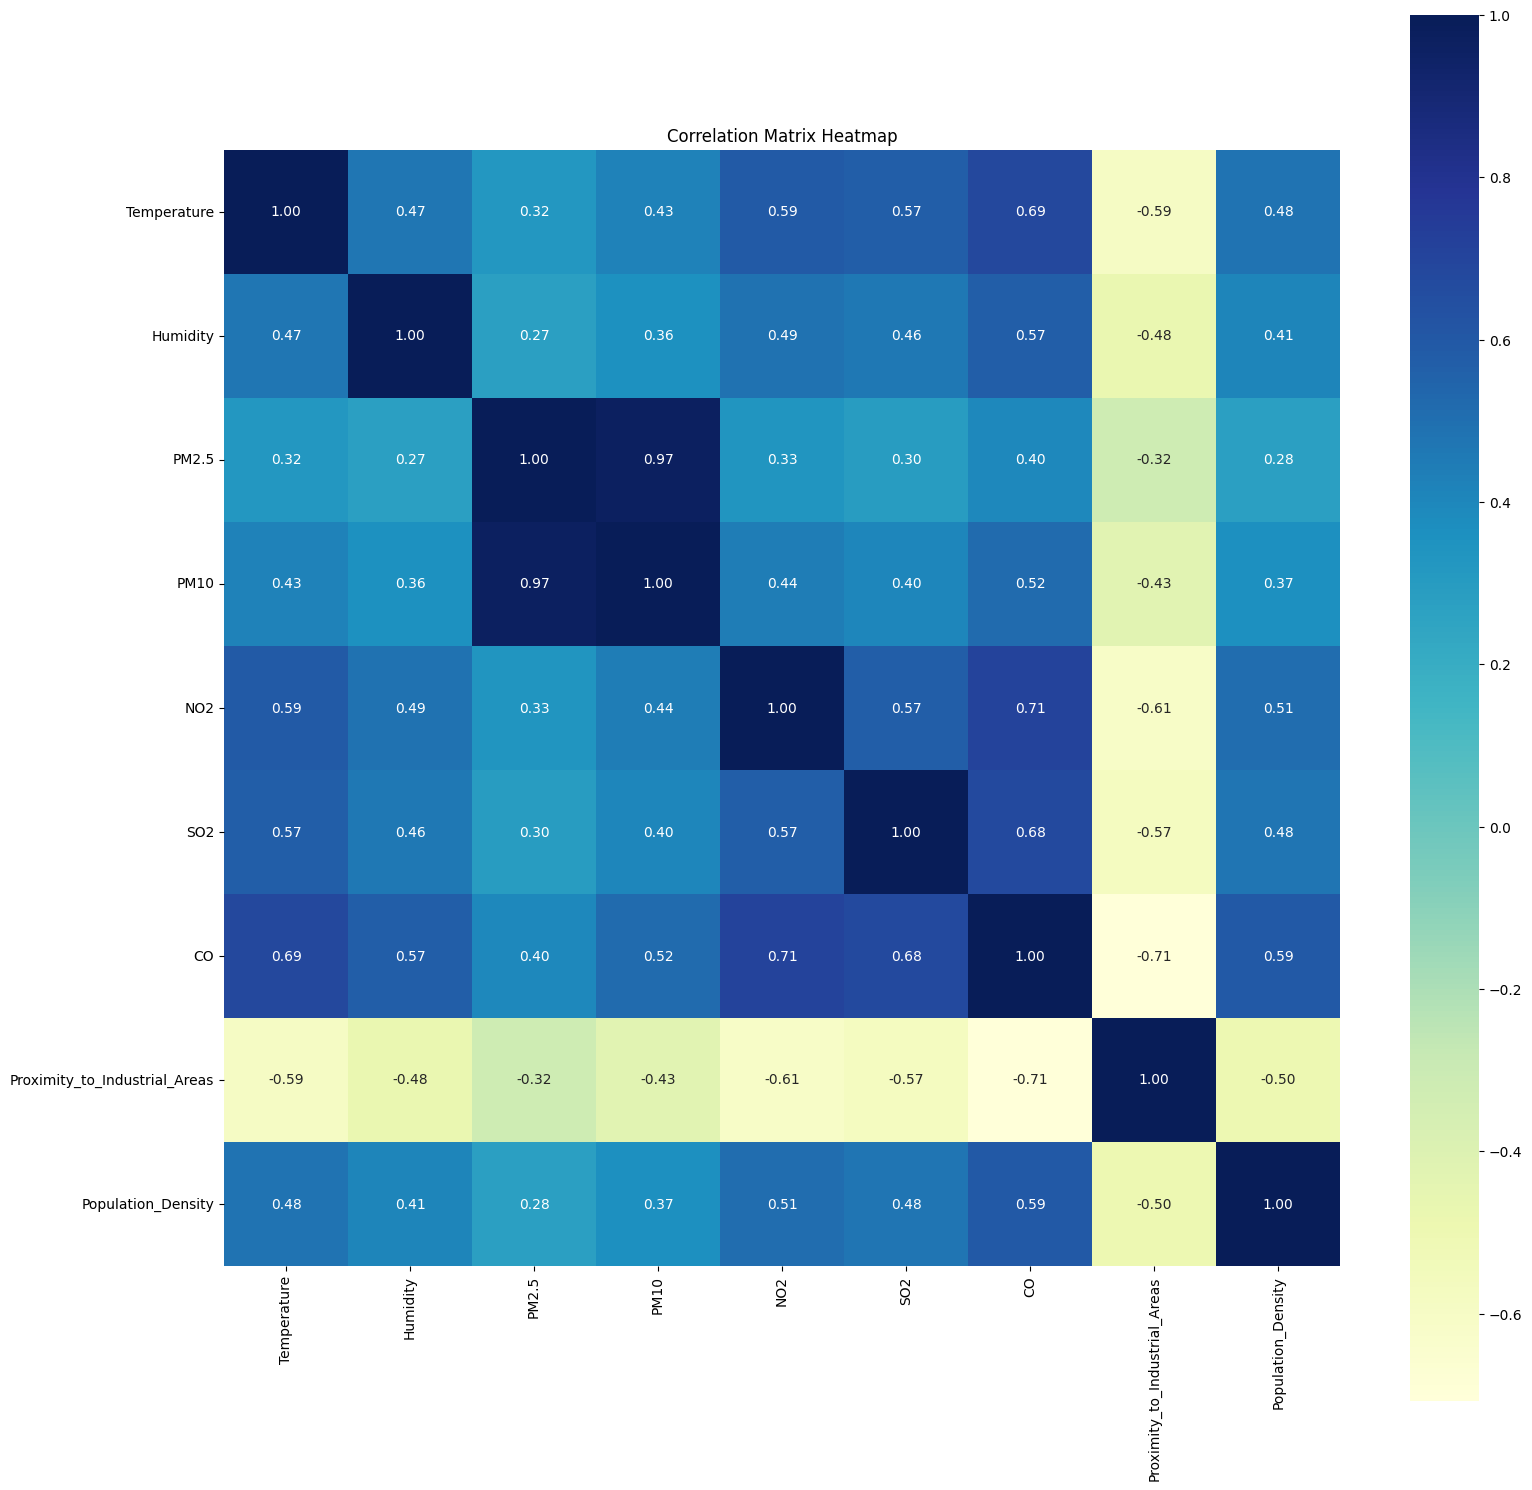

In [ ]:
dataq = data.select_dtypes(include=['float64', 'int64'])
data_correlation = dataq.corr()


# Plot the heatmap
plt.figure(figsize=(18, 18))
sns.heatmap(data_correlation, cmap='YlGnBu', annot=True, square=True, fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()

In [ ]:
data = data.drop('PM2.5', axis=1)
data.head(5)

,Temperature,Humidity,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,29.8,59.1,17.9,18.9,9.2,1.72,6.3,319,Moderate
1,28.3,75.6,12.2,30.8,9.7,1.64,6.0,611,Moderate
2,23.1,74.7,33.8,24.4,12.6,1.63,5.2,619,Moderate
3,27.1,39.1,6.3,13.5,5.3,1.15,11.1,551,Good
4,26.5,70.7,16.0,21.9,5.6,1.01,12.7,303,Good


In [ ]:
# Check class distribution
print("\nClass Distribution:\n")
print(data['Air Quality'].value_counts()) #not balanced



Class Distribution:

Air Quality
Good         2000
Moderate     1500
Poor         1000
Hazardous     500
Name: count, dtype: int64


<ipython-input-881-bdf13e2816ed>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Air Quality', data=data, palette='viridis')


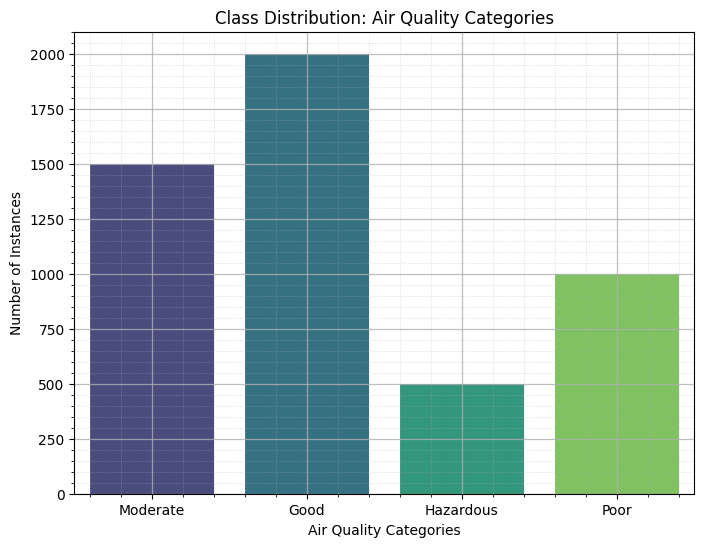

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Air Quality', data=data, palette='viridis')
plt.title('Class Distribution: Air Quality Categories')
plt.xlabel('Air Quality Categories')
plt.ylabel('Number of Instances')

plt.grid(which='major', linestyle='-', linewidth=0.9, alpha=0.8)  # Major grid
plt.minorticks_on()
plt.grid(which='minor', linestyle=':', linewidth=0.6, alpha=0.5)  # Minor grid

plt.show()

In [ ]:
data.describe()

,Temperature,Humidity,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,30.029020,70.056120,30.218360,26.412100,10.014820,1.500354,8.425400,497.423800
std,6.720661,15.863577,27.349199,8.895356,6.750303,0.546027,3.610944,152.754084
min,13.400000,36.000000,-0.200000,7.400000,-6.200000,0.650000,2.500000,188.000000
25%,25.100000,58.300000,12.300000,20.100000,5.100000,1.030000,5.400000,381.000000
50%,29.000000,69.800000,21.700000,25.300000,8.000000,1.410000,7.900000,494.000000
75%,34.000000,80.300000,38.100000,31.900000,13.725000,1.840000,11.100000,600.000000
max,58.600000,128.100000,315.800000,64.900000,44.900000,3.720000,25.800000,957.000000


# Standardization

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
quantitative_columns = data.select_dtypes(include=['float64', 'int64']).columns
# took the quantitative columns

In [ ]:
scaler = StandardScaler()
standardized_features = scaler.fit_transform(data[quantitative_columns])

standardized_dataset = pd.DataFrame(standardized_features, columns=quantitative_columns)
if 'Air Quality' in data.columns:
    standardized_dataset['Air Quality'] = data['Air Quality']

In [ ]:
standardized_dataset.describe()

,Temperature,Humidity,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density
count,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03
mean,-4.007461e-16,4.554579e-16,-1.474376e-16,1.335820e-16,-7.247536e-17,-3.346656e-16,5.258016e-17,-1.875833e-16
std,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00
min,-2.474560e+00,-2.147027e+00,-1.112332e+00,-2.137520e+00,-2.402328e+00,-1.557505e+00,-1.641120e+00,-2.025836e+00
25%,-7.334863e-01,-7.411504e-01,-6.552350e-01,-7.096659e-01,-7.281616e-01,-8.614983e-01,-8.379257e-01,-7.622411e-01
50%,-1.531282e-01,-1.614678e-02,-3.114977e-01,-1.250328e-01,-2.985083e-01,-1.654920e-01,-1.455167e-01,-2.241605e-02
75%,5.909206e-01,6.458130e-01,2.882142e-01,6.170016e-01,5.496866e-01,6.220941e-01,7.407669e-01,6.715792e-01
max,4.251641e+00,3.659306e+00,1.044309e+01,4.327173e+00,5.168459e+00,4.065494e+00,4.812132e+00,3.008903e+00


# Categorical Encoding


In [ ]:
# from sklearn.preprocessing import LabelEncoder, StandardScaler
# label_encoder = LabelEncoder()
# data['Air Quality Encoded'] = label_encoder.fit_transform(data['Air Quality'])
# label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
# print("\nLabel Encoding Mapping:\n", label_mapping)
# data.head()

In [ ]:
# from sklearn.model_selection import train_test_split

# X = data.select_dtypes(include=['float64', 'int64'])
# Y = data['Air Quality Encoded']

# X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, train_size=0.7, random_state=42)

In [ ]:
#KNN with Encoded
# from sklearn.neighbors import KNeighborsClassifier
# knn_model = KNeighborsClassifier()

# knn_model.fit(X_train, y_train)

# y_pred_knn = knn_model.predict(X_test)

# print(y_pred_knn)
# report1en = classification_report(y_test, y_pred_knn)
# print(report1en)

In [ ]:
#Decision tree with Encoded
# from sklearn.tree import DecisionTreeClassifier
# dt_model=DecisionTreeClassifier()

# dt_model.fit(X_train, y_train)

# y_pred_dt = dt_model.predict(X_test)

# print(y_pred_dt)
# report2en = classification_report(y_test, y_pred_dt)
# print(report2en)

In [ ]:
#Naive Bayes with Encoded
# from sklearn.naive_bayes import GaussianNB
# nb_model = GaussianNB()

# nb_model.fit(X_train, y_train)

# y_pred_nb = nb_model.predict(X_test)

# print(y_pred_nb)
# report3en = classification_report(y_test, y_pred_nb)
# print(report3en)

# Train Split


In [ ]:
from sklearn.model_selection import train_test_split

X = data.select_dtypes(include=['float64', 'int64'])
Y = data['Air Quality']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, train_size=0.7, random_state=42)

In [ ]:
categories = ['Good', ' Hazardous', 'Moderate', 'Poor']

# KNN


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()

In [ ]:
knn_model.fit(X_train, y_train)

y_pred_knn = knn_model.predict(X_test)

print(y_pred_knn)

['Hazardous' 'Good' 'Good' ... 'Moderate' 'Poor' 'Good']


In [ ]:
knn_ac = accuracy_score(y_test,y_pred_knn)
print(knn_ac)

0.8


In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred_knn)
print(conf_matrix)

[[595   0  23   0]
 [  0  79   6  63]
 [ 54   1 357  40]
 [  0  24  89 169]]


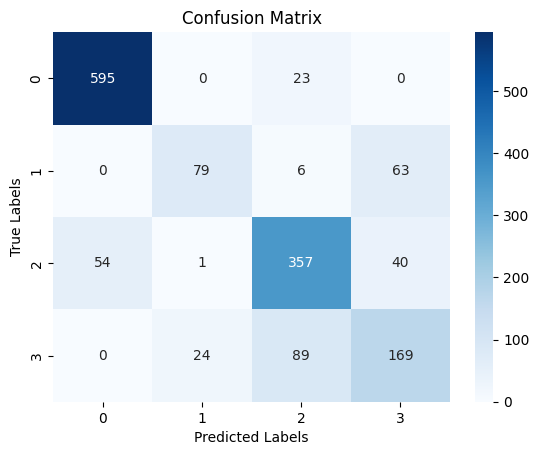

In [ ]:
cm = confusion_matrix(y_true = y_test, y_pred = y_pred_knn)
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

[595  79 357 169]


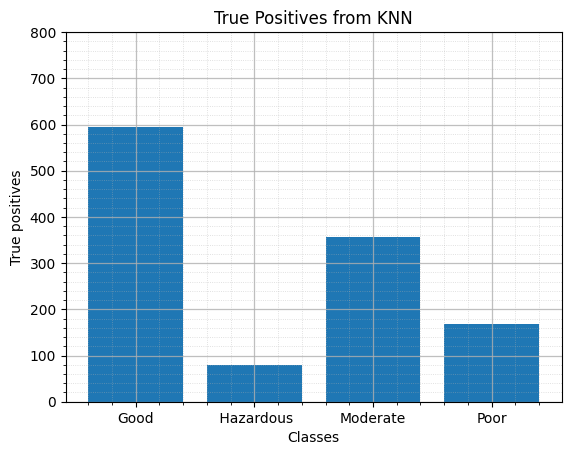

In [ ]:
true_positive = np.diag(conf_matrix)
print(true_positive)

plt.bar(x=categories, height=true_positive)
plt.xlabel("Classes")
plt.ylabel("True positives")


plt.grid(which='major', linestyle='-', linewidth=0.9, alpha=0.8)  # Major grid
plt.minorticks_on()
plt.grid(which='minor', linestyle=':', linewidth=0.6, alpha=0.5)  # Minor grid


plt.ylim(0, 800)
plt.title("True Positives from KNN")
plt.show()

In [ ]:
report1 = classification_report(y_test, y_pred_knn)
print(report1)

              precision    recall  f1-score   support

        Good       0.92      0.96      0.94       618
   Hazardous       0.76      0.53      0.63       148
    Moderate       0.75      0.79      0.77       452
        Poor       0.62      0.60      0.61       282

    accuracy                           0.80      1500
   macro avg       0.76      0.72      0.74      1500
weighted avg       0.80      0.80      0.80      1500



In [ ]:
report1_1 = classification_report(y_test, y_pred_knn, output_dict = True)
class_labels = []
precision_values = []
recall_values = []
for class_label, metrics in report1_1.items():
  if class_label not in ["accuracy", "macro avg", "weighted avg"]:
        class_labels.append(class_label)
        precision_values.append(metrics["precision"])
        recall_values.append(metrics["recall"])

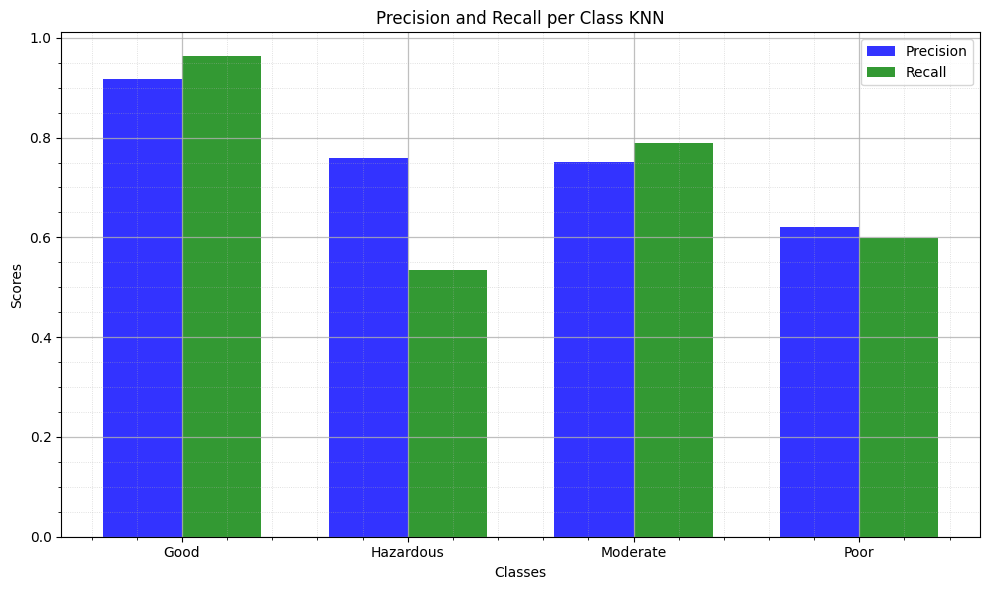

In [ ]:
bar_width = 0.35
x = np.arange(len(class_labels))

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Precision bars
ax.bar(x - bar_width / 2, precision_values, bar_width, label='Precision', alpha=0.8, color='b')

# Recall bars
ax.bar(x + bar_width / 2, recall_values, bar_width, label='Recall', alpha=0.8, color='g')

# Adding labels, title, and legend
ax.set_xlabel('Classes')
ax.set_ylabel('Scores')
ax.set_title('Precision and Recall per Class KNN')
ax.set_xticks(x)
ax.set_xticklabels(class_labels)
ax.legend()

plt.grid(which='major', linestyle='-', linewidth=0.9, alpha=0.8)  # Major grid
plt.minorticks_on()
plt.grid(which='minor', linestyle=':', linewidth=0.6, alpha=0.5)  # Minor grid

# Show the plot
plt.tight_layout()
plt.show()

#DECISION TREE

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_model=DecisionTreeClassifier()

In [ ]:
dt_model.fit(X_train, y_train)

y_pred_dt = dt_model.predict(X_test)

print(y_pred_dt)

['Hazardous' 'Good' 'Good' ... 'Moderate' 'Poor' 'Good']


In [ ]:
dt_ac=accuracy_score(y_test,y_pred_dt)
print(dt_ac)

0.9126666666666666


In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred_dt)
print(conf_matrix)

[[616   0   2   0]
 [  0 120   2  26]
 [  4   0 408  40]
 [  0  30  27 225]]


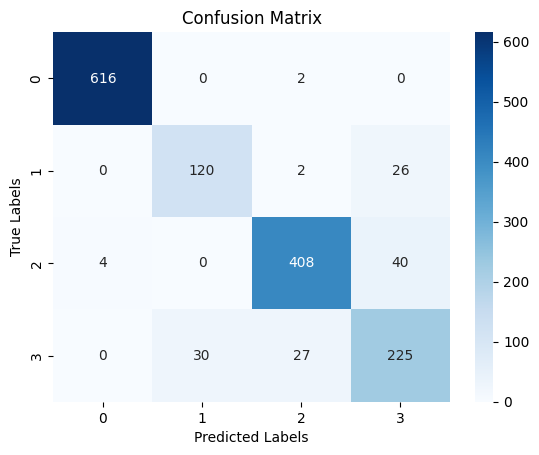

In [ ]:
cm = confusion_matrix(y_true = y_test, y_pred = y_pred_dt)
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

[616 120 408 225]


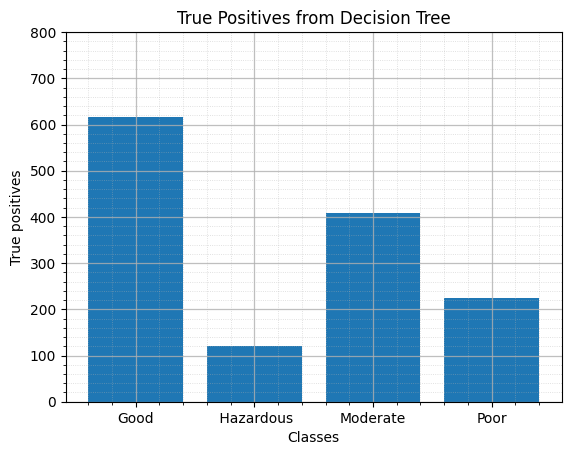

In [ ]:
true_positive = np.diag(conf_matrix)
print(true_positive)

plt.bar(x=categories, height=true_positive)
plt.xlabel("Classes")
plt.ylabel("True positives")


plt.grid(which='major', linestyle='-', linewidth=0.9, alpha=0.8)  # Major grid
plt.minorticks_on()  # Enable minor ticks
plt.grid(which='minor', linestyle=':', linewidth=0.6, alpha=0.5)  # Minor grid


plt.ylim(0, 800)  # Adjust the upper limit slightly above 1 for better visibility
plt.title("True Positives from Decision Tree")
plt.show()

In [ ]:
report2 = classification_report(y_test, y_pred_dt)
print(report2)

              precision    recall  f1-score   support

        Good       0.99      1.00      1.00       618
   Hazardous       0.80      0.81      0.81       148
    Moderate       0.93      0.90      0.92       452
        Poor       0.77      0.80      0.79       282

    accuracy                           0.91      1500
   macro avg       0.87      0.88      0.88      1500
weighted avg       0.91      0.91      0.91      1500



In [ ]:
report2_2 = classification_report(y_test, y_pred_dt, output_dict = True)
class_labels = []
precision_values = []
recall_values = []
for class_label, metrics in report2_2.items():
  if class_label not in ["accuracy", "macro avg", "weighted avg"]:
        class_labels.append(class_label)
        precision_values.append(metrics["precision"])
        recall_values.append(metrics["recall"])

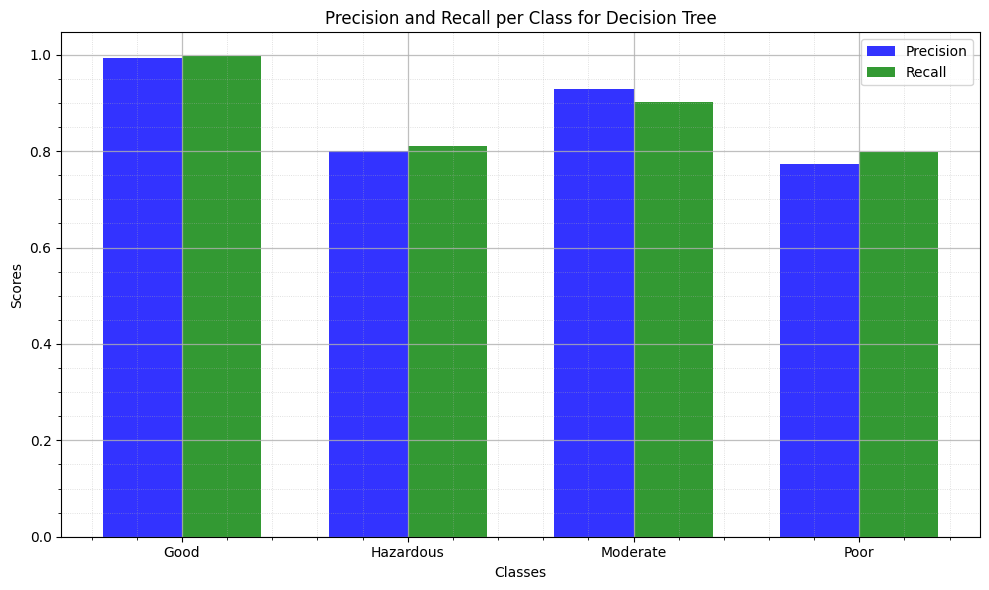

In [ ]:
bar_width = 0.35
x = np.arange(len(class_labels))

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Precision bars
ax.bar(x - bar_width / 2, precision_values, bar_width, label='Precision', alpha=0.8, color='b')

# Recall bars
ax.bar(x + bar_width / 2, recall_values, bar_width, label='Recall', alpha=0.8, color='g')


ax.set_xlabel('Classes')
ax.set_ylabel('Scores')
ax.set_title('Precision and Recall per Class for Decision Tree')
ax.set_xticks(x)
ax.set_xticklabels(class_labels)
ax.legend()

plt.grid(which='major', linestyle='-', linewidth=0.9, alpha=0.8)  # Major grid
plt.minorticks_on()
plt.grid(which='minor', linestyle=':', linewidth=0.6, alpha=0.5)  # Minor grid

# Show the plot
plt.tight_layout()
plt.show()

# Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()

In [ ]:
nb_model.fit(X_train, y_train)

y_pred_nb = nb_model.predict(X_test)

print(y_pred_nb)

['Hazardous' 'Good' 'Moderate' ... 'Moderate' 'Moderate' 'Good']


In [ ]:
print(y_test)

1501    Hazardous
2586         Good
2653     Moderate
1055    Hazardous
705          Good
          ...    
3563         Good
1538     Moderate
1837     Moderate
2380         Poor
1912         Good
Name: Air Quality, Length: 1500, dtype: object


In [ ]:
nb_ac=accuracy_score(y_test,y_pred_nb)

print(nb_ac)

0.9353333333333333


In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred_nb)
print(conf_matrix)

[[617   0   1   0]
 [  0 118   0  30]
 [  1   0 427  24]
 [  0  17  24 241]]


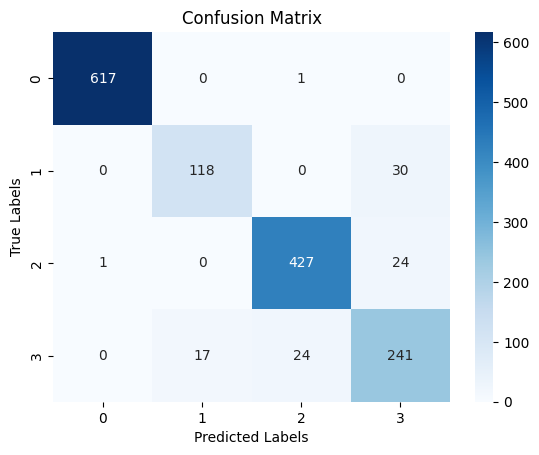

In [ ]:
cm = confusion_matrix(y_true = y_test, y_pred = y_pred_nb)
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

[617 118 427 241]


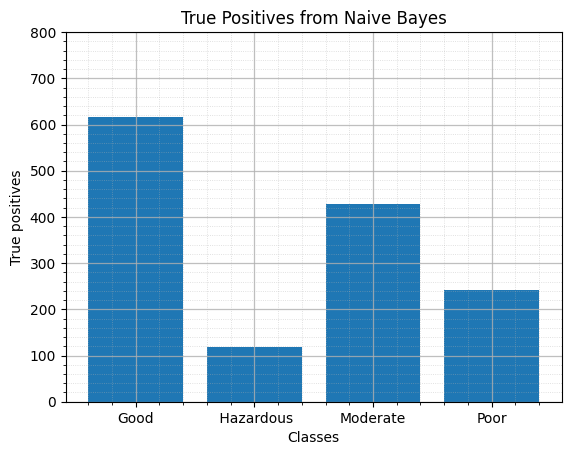

In [ ]:
true_positive = np.diag(conf_matrix)
print(true_positive)

plt.bar(x=categories, height=true_positive)
plt.xlabel("Classes")
plt.ylabel("True positives")


plt.grid(which='major', linestyle='-', linewidth=0.9, alpha=0.8)  # Major grid
plt.minorticks_on()  # Enable minor ticks
plt.grid(which='minor', linestyle=':', linewidth=0.6, alpha=0.5)  # Minor grid


plt.ylim(0, 800)  # Adjust the upper limit slightly above 1 for better visibility
plt.title("True Positives from Naive Bayes")
plt.show()

In [ ]:
report3 = classification_report(y_test, y_pred_nb)
print(report3)

              precision    recall  f1-score   support

        Good       1.00      1.00      1.00       618
   Hazardous       0.87      0.80      0.83       148
    Moderate       0.94      0.94      0.94       452
        Poor       0.82      0.85      0.84       282

    accuracy                           0.94      1500
   macro avg       0.91      0.90      0.90      1500
weighted avg       0.94      0.94      0.94      1500



In [ ]:
report3_3 = classification_report(y_test, y_pred_nb, output_dict = True)
class_labels = []
precision_values = []
recall_values = []
for class_label, metrics in report3_3.items():
  if class_label not in ["accuracy", "macro avg", "weighted avg"]:
        class_labels.append(class_label)
        precision_values.append(metrics["precision"])
        recall_values.append(metrics["recall"])

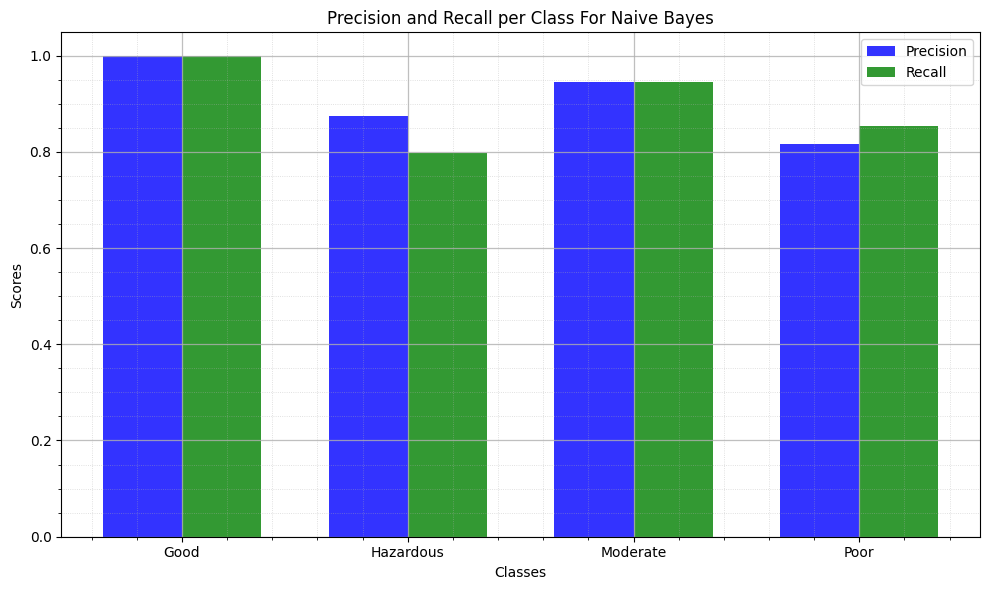

In [ ]:
bar_width = 0.35
x = np.arange(len(class_labels))

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Precision bars
ax.bar(x - bar_width / 2, precision_values, bar_width, label='Precision', alpha=0.8, color='b')

# Recall bars
ax.bar(x + bar_width / 2, recall_values, bar_width, label='Recall', alpha=0.8, color='g')

# Adding labels, title, and legend
ax.set_xlabel('Classes')
ax.set_ylabel('Scores')
ax.set_title('Precision and Recall per Class For Naive Bayes')
ax.set_xticks(x)
ax.set_xticklabels(class_labels)
ax.legend()

plt.grid(which='major', linestyle='-', linewidth=0.9, alpha=0.8)  # Major grid
plt.minorticks_on()
plt.grid(which='minor', linestyle=':', linewidth=0.6, alpha=0.5)  # Minor grid


# Show the plot
plt.tight_layout()
plt.show()

# Ploting


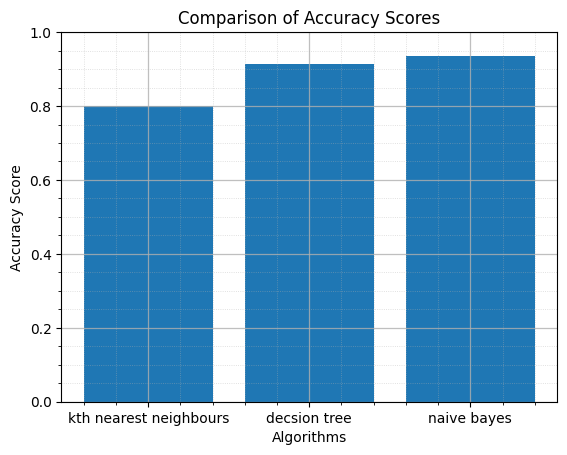

In [ ]:
plt.bar(x=['kth nearest neighbours', 'decsion tree', 'naive bayes'], height=[knn_ac, dt_ac, nb_ac])
plt.xlabel("Algorithms")
plt.ylabel("Accuracy Score")

plt.grid(which='major', linestyle='-', linewidth=0.9, alpha=0.8)  # Major grid
plt.minorticks_on()
plt.grid(which='minor', linestyle=':', linewidth=0.6, alpha=0.5)  # Minor grid

# Set the y-axis limit
plt.ylim(0, 1)  # Adjust the upper limit slightly above 1 for better visibility
plt.title("Comparison of Accuracy Scores")
plt.show()